<a href="https://colab.research.google.com/github/ShibinMohammed/Data-science-projects/blob/main/Credit_Card_Clients_in_Taiwan_in_2005.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Clients in Taiwan in 2005

---

### Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. There are 25 features in the dataset. They are as follows:

1. `ID:` Identification of each credit card client

2. `LIMIT_BAL:` The maximum amount or credit (in NT dollar) a client can spend in a month (includes individual and family/supplementary credit)

3. `SEX`: Gender of a client where`1` denotes male client and `2` denotes a female client

4. `EDUCATION`: Education qualification of a credit card holder:

      - `1` denotes that a client graduated from a graduate school

      - `2` denotes that a client is a university graduate

      - `3` denotes that a client is a high school graduate

      - `4` denotes that a client graduated from some other institution

      - `5` denotes that the graduation status of a client is unknown

5. `MARRIAGE`: Marital status of a client:
    
      - `1` denotes that the client is married
      
      - `2` denotes that the client is single or unmarried
      
      - `3` covers all the other possibilities of marital status such as divorced, widowed etc

6. `AGE`: Age of a client in years

7. `PAY_0`: Repayment status of a client in September 2005
      
      - `-1` denotes the payment is not due

      - `1` denotes that the payment is delayed by one month

      - `2` denotes that the payment is delayed by two months

        ...

      - `8` denotes that the payment is delayed by eight months

      - `9` denotes that the payment is delayed by nine months and above

8. `PAY_2`: Repayment status of a client in August 2005 (scale same as above)

9. `PAY_3`: Repayment status of a client in July 2005 (scale same as above)

10. `PAY_4`: Repayment status of a client in June 2005 (scale same as above)

11. `PAY_5`: Repayment status of a client in May 2005 (scale same as above)

12. `PAY_6`: Repayment status of a client in April 2005 (scale same as above)

13. `BILL_AMT1`: Amount of bill statement in September 2005 (NT dollar)

14. `BILL_AMT2`: Amount of bill statement in August 2005 (NT dollar)

15. `BILL_AMT3`: Amount of bill statement in July 2005 (NT dollar)

16. `BILL_AMT4`: Amount of bill statement in June 2005 (NT dollar)

17. `BILL_AMT5`: Amount of bill statement in May 2005 (NT dollar)

18. `BILL_AMT6`: Amount of bill statement in April 2005 (NT dollar)

19. `PAY_AMT1`: Amount of previous payment in September 2005 (NT dollar)

20. `PAY_AMT2`: Amount of previous payment in August 2005 (NT dollar)

21. `PAY_AMT3`: Amount of previous payment in July 2005 (NT dollar)

22. `PAY_AMT4`: Amount of previous payment in June 2005 (NT dollar)

23. `PAY_AMT5`: Amount of previous payment in May 2005 (NT dollar)

24. `PAY_AMT6`: Amount of previous payment in April 2005 (NT dollar)

25. `default.payment.next.month`: The default payment status of a client in the following month (October) where

      - `1` means `yes` the client is a defaulter i.e., they failed to make the payment due in the following month

      - `0` means `no` the client is NOT a defaulter i.e., they successfully made the payment due in the following month

### Acknowledgements

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and
Computer Science.

Click on the link provided below to get the original dataset from the UCI Machine Learning repository.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


---

In [ ]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset.
cred_card_df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv')
cred_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Number of rows and columns.
cred_card_df.shape

(30000, 25)

In [ ]:
# Check for the missing values.
cred_card_df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
# Counts of each value in the 'EDUCATION' column.
cred_card_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [ ]:
# Check the data-type of the 'EDUCATION' column.
cred_card_df['EDUCATION'].dtype

dtype('int64')

In [ ]:
# Replace the unwanted values in the 'EDUCATION' column. Ignore if there are none.
cred_card_df.loc[cred_card_df['EDUCATION'] == 0,'EDUCATION'] = 5
cred_card_df.loc[cred_card_df['EDUCATION'] == 6,'EDUCATION'] = 5
cred_card_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [ ]:
# Percentage of each value in the 'EDUCATION' column.
percent = cred_card_df['EDUCATION'].value_counts()*100/cred_card_df.shape[0]
percent

2    46.766667
1    35.283333
3    16.390000
5     1.150000
4     0.410000
Name: EDUCATION, dtype: float64

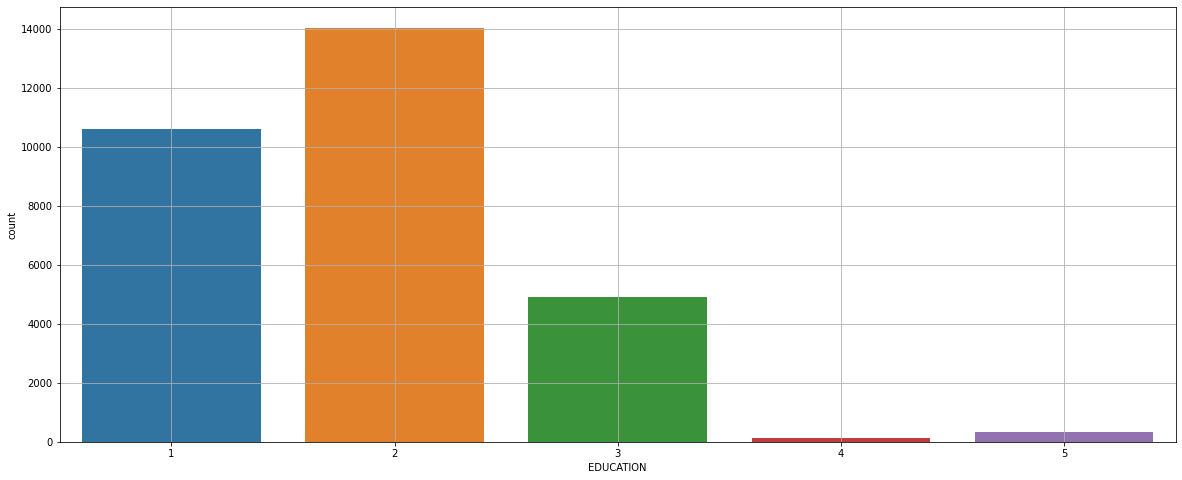

In [ ]:
# Count plot for the 'EDUCATION' column.
plt.figure(figsize=(20,8))
sns.countplot(x = 'EDUCATION',data = cred_card_df)
plt.grid()
plt.show()

In [ ]:
# Check the data-types of all the columns using the 'info()' function.
cred_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
# Counts of male and female clients.
cred_card_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Percentage of male and female clients.
percent_1 = cred_card_df['SEX'].value_counts()*100/cred_card_df.shape[0]
percent_1

2    60.373333
1    39.626667
Name: SEX, dtype: float64

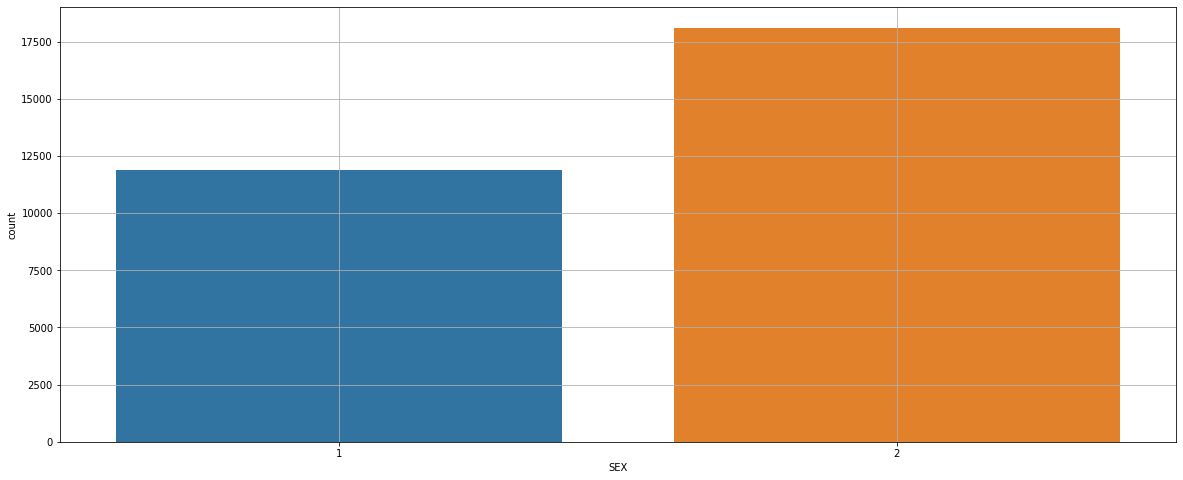

In [ ]:
# Count plot for the gender of clients.
plt.figure(figsize=(20,8))
sns.countplot(x = 'SEX',data = cred_card_df)
plt.grid()
plt.show()

In [ ]:
# Counts of each value in the 'MARRIAGE' column.
cred_card_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [ ]:
# Replace the unwanted values in the 'MARRIAGE' column. Ignore if there are none.
cred_card_df.loc[cred_card_df['MARRIAGE'] == 0,'MARRIAGE'] = 3
cred_card_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
# Percentage of the values in the 'MARRIAGE' column.
percent_2 = cred_card_df['MARRIAGE'].value_counts()*100/cred_card_df.shape[0]
percent_2

2    53.213333
1    45.530000
3     1.256667
Name: MARRIAGE, dtype: float64

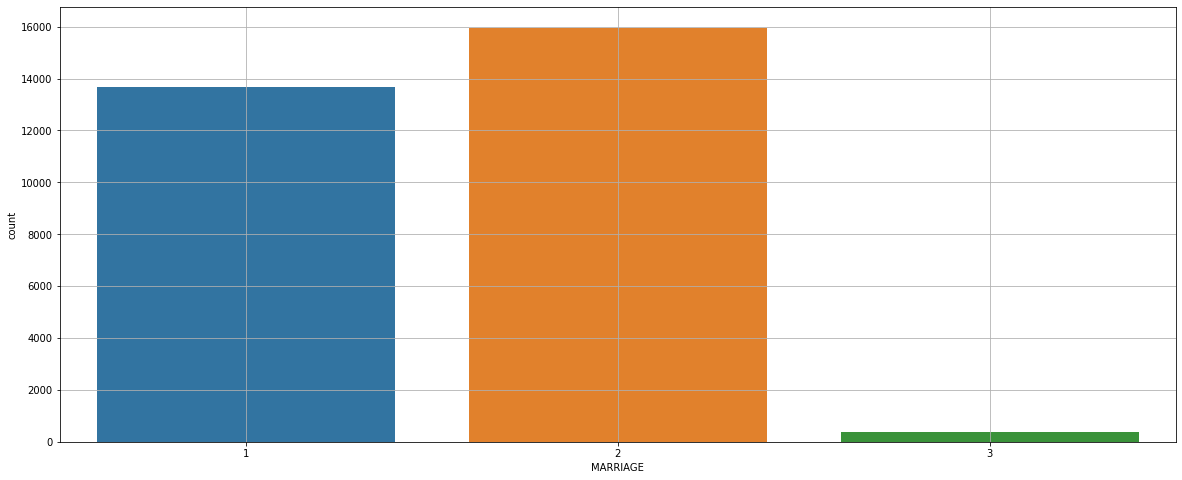

In [ ]:
# Count plot for the 'MARRIAGE' column.
plt.figure(figsize=(20,8))
sns.countplot(x = 'MARRIAGE',data = cred_card_df)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


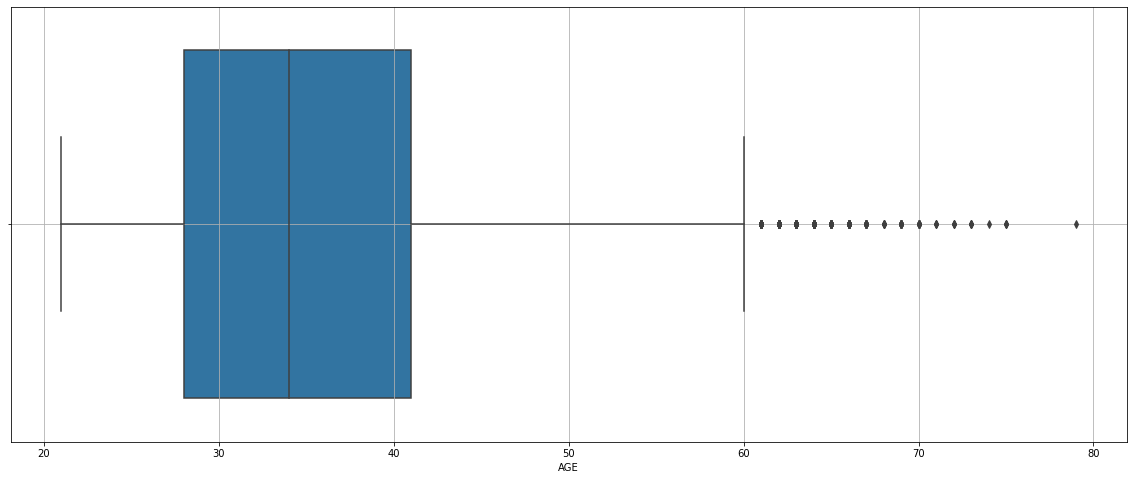

In [ ]:
# Box plot for the 'AGE' column.
plt.figure(figsize=(20,8))
sns.boxplot(cred_card_df['AGE'])
plt.grid()
plt.show()

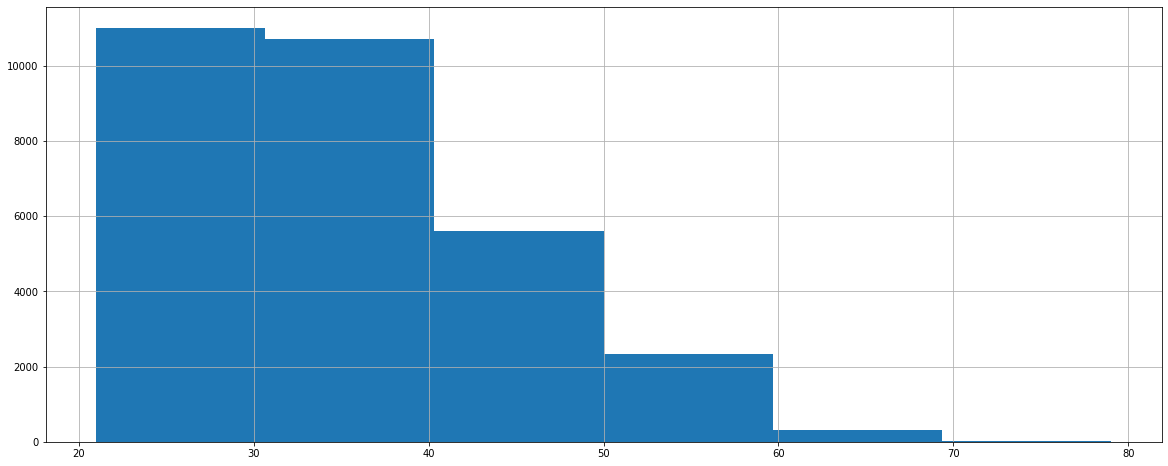

In [ ]:
# Histogram for the 'AGE' column.
plt.figure(figsize=(20,8))
plt.hist(cred_card_df['AGE'],bins = 6)
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


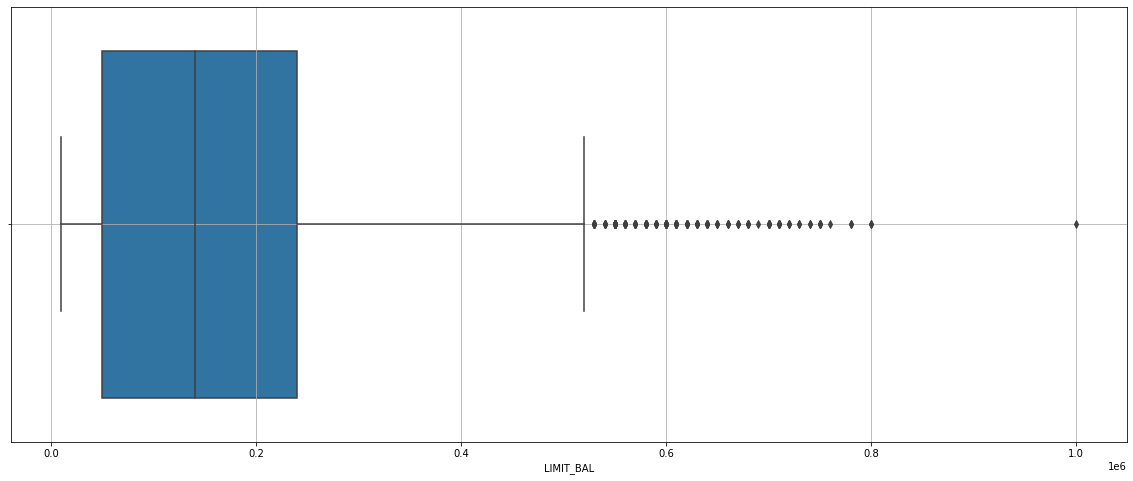

In [ ]:
# Boxplot for the LIMIT_BAL column.
plt.figure(figsize=(20,8))
sns.boxplot(cred_card_df['LIMIT_BAL'])
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


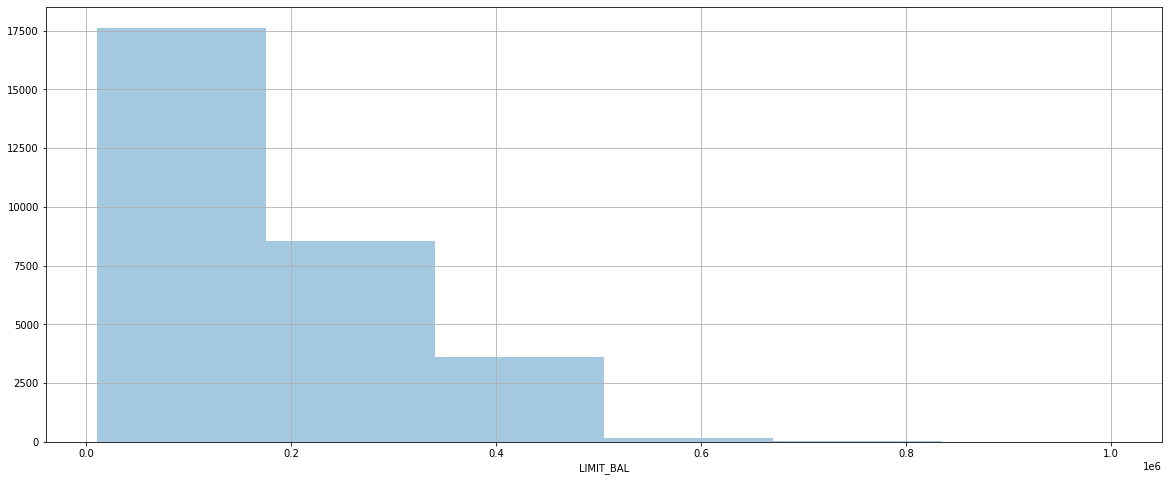

In [ ]:
# Histogram for the 'LIMIT_BAL' column using a function from the 'seaborn' module.
plt.figure(figsize=(20,8))
sns.distplot(cred_card_df['LIMIT_BAL'],bins = 6,kde = False)
plt.grid()
plt.show()

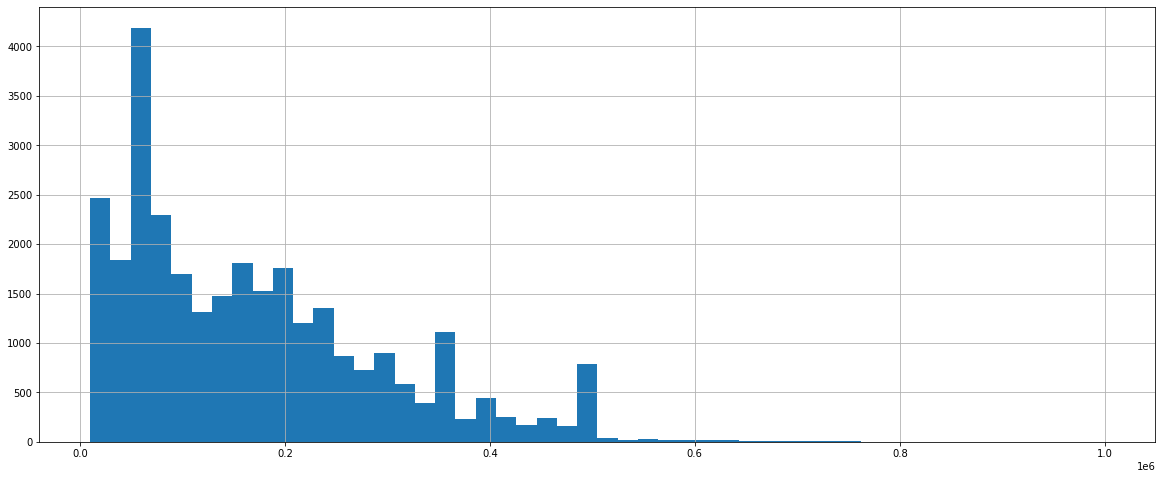

In [ ]:
# Histogram (having 50 bins) for the 'LIMIT_BAL' column using a function from the 'matplotlib.pyplot' module.
plt.figure(figsize=(20,8))
plt.hist(cred_card_df['LIMIT_BAL'],bins = 50)
plt.grid()
plt.show()